In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

data = pd.read_csv("C:/Users/UserName/Desktop/인공지능 개론/데이터 셋/Raisin_Dataset/Raisin_Dataset/Raisin_Dataset.csv")
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [109]:
data.shape

(900, 8)

<h3>#결측치 확인 및 제거</h3>

In [110]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

<h3>#labeling 확인 그래프</h3>

Text(0.5, 1.0, 'class')

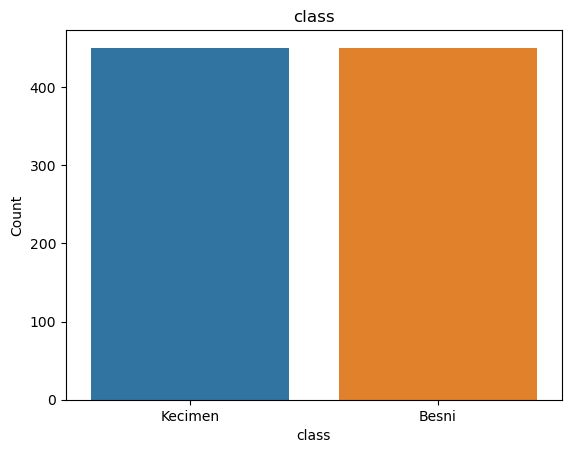

In [111]:
sns.countplot(data = data, x="Class")
plt.xlabel("class")
plt.ylabel("Count")
plt.title("class")

<h3>#데이터 값들 숫자로 바꾸기</h3>

In [112]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [113]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,551,553,500,558,542,811,544,1
1,404,446,409,469,413,299,453,1
2,583,554,581,448,571,102,573,1
3,74,54,159,108,68,394,66,1
4,462,254,709,33,445,890,382,1
...,...,...,...,...,...,...,...,...
895,504,512,449,542,492,215,461,0
896,549,546,540,508,549,99,577,0
897,640,517,739,174,650,722,656,0
898,600,633,506,683,600,177,622,0


<h3>#Dense 층만 사용하여 이진분류</h3>

In [114]:
X = data.iloc[:,0:7].values
y = data.iloc[:,7].values

# from sklearn.preprocessing import LabelEncoder
# encoder =  LabelEncoder()
# y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [115]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(58,input_shape=(7,),activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.0028),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 58)                464       
                                                                 
 dense_36 (Dense)            (None, 128)               7552      
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dense_38 (Dense)            (None, 256)               33024     
                                                                 
 dense_39 (Dense)            (None, 2)                 514       
                                                                 
Total params: 58,066
Trainable params: 58,066
Non-trainable params: 0
_________________________________________________________________


c:\new\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [116]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=12,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
60/60 [==============================] - 1s 4ms/step - loss: 5.0461 - accuracy: 0.7694 - val_loss: 0.5664 - val_accuracy: 0.8222
Epoch 2/100
60/60 [==============================] - 0s 2ms/step - loss: 0.5319 - accuracy: 0.7972 - val_loss: 0.4545 - val_accuracy: 0.8056
Epoch 3/100
60/60 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8153 - val_loss: 0.3558 - val_accuracy: 0.8833
Epoch 4/100
60/60 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.8153 - val_loss: 0.4057 - val_accuracy: 0.8167
Epoch 5/100
60/60 [==============================] - 0s 2ms/step - loss: 0.3851 - accuracy: 0.8389 - val_loss: 0.3277 - val_accuracy: 0.8944
Epoch 6/100
60/60 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8444 - val_loss: 0.4252 - val_accuracy: 0.8111
Epoch 7/100
60/60 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8194 - val_loss: 0.3920 - val_accuracy: 0.8278
Epoch 8/100
6

<h3>#epoch 증가에 따른 loss와 accuracy 변화</h3>

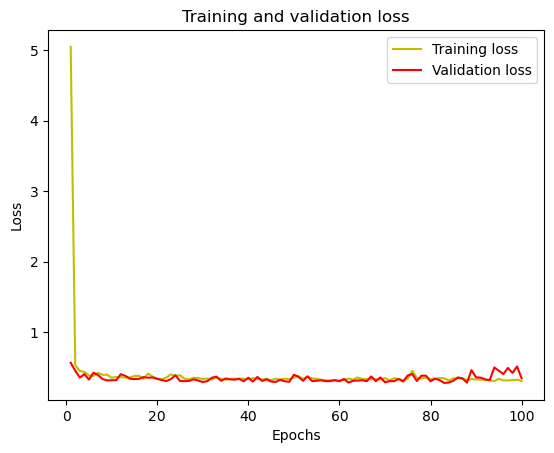

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

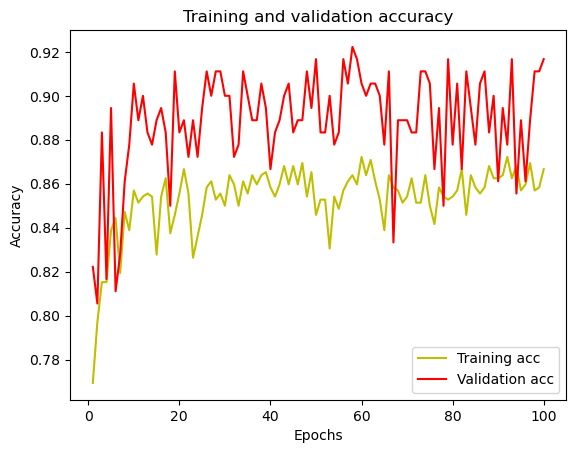

In [118]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [119]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        97
           1       0.88      0.95      0.91        83

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180

[[86 11]
 [ 4 79]]
